<a href="https://colab.research.google.com/github/sachinthadilshann/TensorFlow_for_Deep_Learning_Bootcamp_Udemy/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the data

In [1]:
import zipfile

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-12-28 12:51:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.0.91, 172.217.7.59, 172.217.12.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.0.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   138MB/s    in 0.8s    

2024-12-28 12:51:05 (138 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# Inspect the data

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [6]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [7]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [8]:
import pathlib
import numpy as np


data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):

  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  #print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img



Image shape: (512, 512, 3)


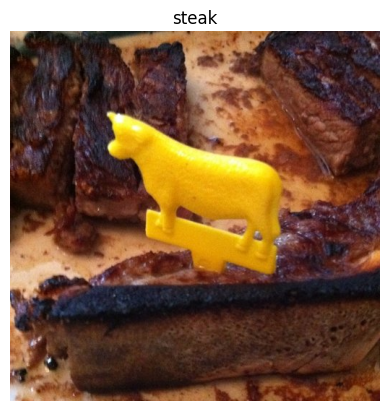

In [10]:
img = view_random_image("pizza_steak/train/", "steak")

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42,
                                               shuffle=True)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42,
                                               shuffle=True)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")

  ])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,101 (121.49 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history_1 = model_1.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                         validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.5413 - loss: 0.7505 - val_accuracy: 0.7380 - val_loss: 0.5159
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.7662 - loss: 0.4966 - val_accuracy: 0.8300 - val_loss: 0.3996
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.7856 - loss: 0.4865 - val_accuracy: 0.8480 - val_loss: 0.3522


In [14]:
result_1 = model_1.evaluate(valid_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 653ms/step - accuracy: 0.8700 - loss: 0.3182


In [15]:
 model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")

  ])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 602,141 (2.30 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history_2 = model_2.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                         validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - accuracy: 0.4835 - loss: 1.5091 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - accuracy: 0.5018 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.5042 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932


In [17]:
result_2 = model_2.evaluate(valid_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.4821 - loss: 0.6933


In [18]:
 tf.random.set_seed(42)

 model_3 = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape = (224,224,3)),
     tf.keras.layers.Dense(100,activation="relu"),
     tf.keras.layers.Dense(100,activation="relu"),
     tf.keras.layers.Dense(100,activation="relu"),
     tf.keras.layers.Dense(1,activation="sigmoid")
 ])

 model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

 model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,073,201 (57.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history_3 = model_3.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                         validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 405ms/step - accuracy: 0.5345 - loss: 6.1982 - val_accuracy: 0.5780 - val_loss: 3.0278
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 376ms/step - accuracy: 0.6405 - loss: 2.0168 - val_accuracy: 0.7140 - val_loss: 0.9317
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 397ms/step - accuracy: 0.7606 - loss: 0.6581 - val_accuracy: 0.7820 - val_loss: 0.4855


In [20]:
result_3 = model_3.evaluate(valid_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.7948 - loss: 0.5121


Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


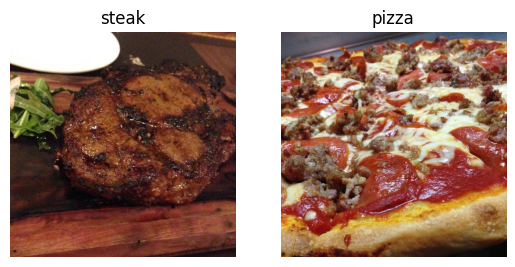

In [21]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/','pizza')

In [22]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [23]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

In [25]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode = "binary",
                                               batch_size = 32)

Found 1500 images belonging to 2 classes.


In [26]:
test_data = train_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode = "binary",
                                               batch_size = 32)

Found 500 images belonging to 2 classes.


In [27]:
images,labels = next(train_data)
len(images),len(labels)

(32, 32)

In [28]:
images[:2],images[0].shape

(array([[[[0.97647065, 0.9450981 , 0.6627451 ],
          [0.97647065, 0.94117653, 0.67058825],
          [0.97647065, 0.94117653, 0.6862745 ],
          ...,
          [0.97647065, 0.90196085, 0.6039216 ],
          [0.9843138 , 0.90196085, 0.5921569 ],
          [0.9843138 , 0.90196085, 0.58431375]],
 
         [[0.9803922 , 0.9450981 , 0.68235296],
          [0.9803922 , 0.9450981 , 0.6901961 ],
          [0.9803922 , 0.94117653, 0.69803923],
          ...,
          [0.97647065, 0.909804  , 0.6039216 ],
          [0.97647065, 0.9058824 , 0.58431375],
          [0.9803922 , 0.909804  , 0.5803922 ]],
 
         [[0.9843138 , 0.9450981 , 0.7019608 ],
          [0.9843138 , 0.9450981 , 0.7058824 ],
          [0.9843138 , 0.9450981 , 0.7137255 ],
          ...,
          [0.9725491 , 0.909804  , 0.6039216 ],
          [0.9725491 , 0.91372555, 0.5882353 ],
          [0.97647065, 0.909804  , 0.5882353 ]],
 
         ...,
 
         [[0.13333334, 0.04313726, 0.01960784],
          [0.12549

In [29]:
images[7].shape


(224, 224, 3)

In [30]:
labels

array([1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.],
      dtype=float32)

In [31]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input

In [32]:
model_4 = Sequential()
model_4.add(Conv2D(filters=10,
                   kernel_size=(3,3),
                   strides=1,
                   padding='valid',
                   activation='relu',
                   input_shape = (224,224,3)

                   ))
model_4.add(Conv2D(10,3,activation='relu'))
model_4.add(Conv2D(10,3,activation='relu'))
model_4.add(Flatten())
model_4.add(Dense(1,activation = 'sigmoid'))


In [33]:
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"]
                )


In [34]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
len(train_data),len(test_data)

(47, 16)

In [36]:
#!pip install tensorboard

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

history_4 = model_4.fit(train_data,
            epochs = 5,
            validation_data = test_data,
            validation_steps = len(test_data),
            callbacks = [tensorboard_callback])

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.6224 - loss: 0.6725 - val_accuracy: 0.8160 - val_loss: 0.4514
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.8525 - loss: 0.3931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.9110 - loss: 0.2553 - val_accuracy: 0.8480 - val_loss: 0.3469
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.9787 - loss: 0.1132
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.9859 - loss: 0.0573 - val_accuracy: 0.8200 - val_loss: 0.3905


In [38]:
result_4 = model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 578ms/step - accuracy: 0.8357 - loss: 0.3701


In [39]:
model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 698ms/step - accuracy: 0.8062 - loss: 0.3902


[0.39054542779922485, 0.8199999928474426]

In [40]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(min(len(loss), len(val_loss)))


  plt.plot(epochs,loss[:len(epochs)],label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy[:len(epochs)],label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

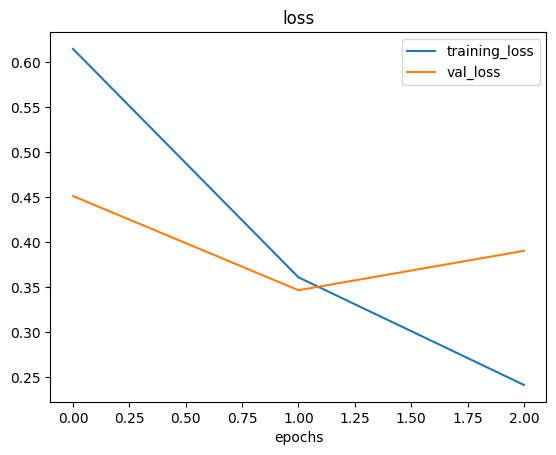

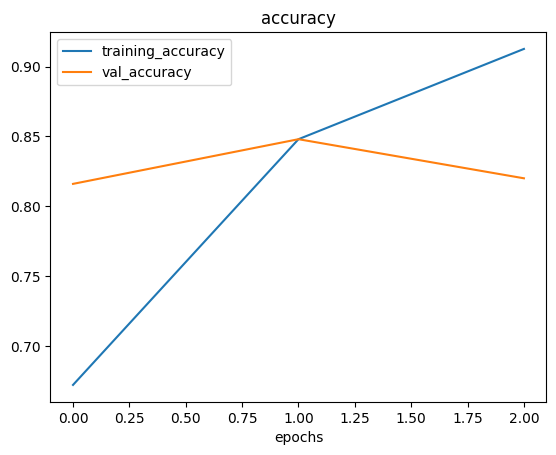

In [41]:
plot_loss_curves(history_4)

In [42]:
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [43]:
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"]
                )


In [44]:
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,861 (34.61 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6057 - loss: 0.6536 - val_accuracy: 0.8140 - val_loss: 0.4185
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 898ms/step - accuracy: 0.7774 - loss: 0.4597
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.8173 - loss: 0.4135 - val_accuracy: 0.7820 - val_loss: 0.4261
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 75s 896ms/step - accuracy: 0.8405 - loss: 0.3855
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.8527 - loss: 0.3670 - val_accuracy: 0.8760 - val_loss: 0.3122


In [46]:
result_5 = model_5.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 321ms/step - accuracy: 0.8762 - loss: 0.3073


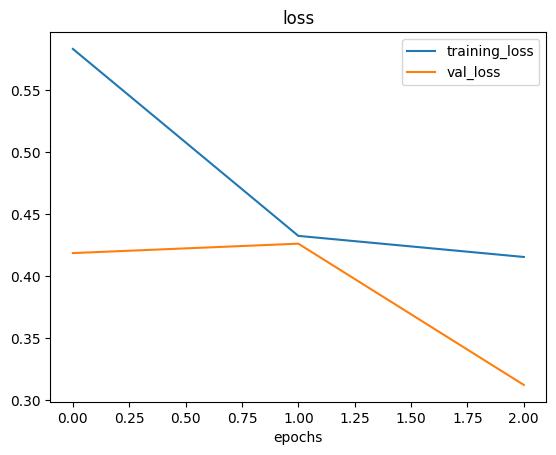

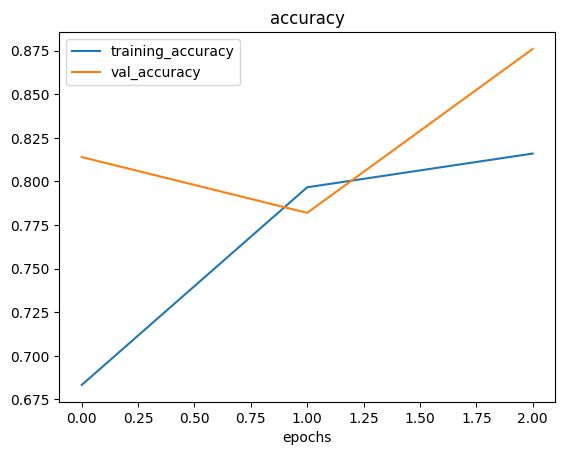

In [47]:
plot_loss_curves(history_5)

In [48]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range  =0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)



In [49]:
print("Augmented data")

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   class_mode = "binary",
                                                                   batch_size = 32,
                                                                   shuffle = False)

print("Non Augmented data")

IMG_SIZE =(224,224)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode ='binary',
                                               shuffle = False)


print("Unchanged Data")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode ='binary',
                                             shuffle = False)




Augmented data
Found 1500 images belonging to 2 classes.
Non Augmented data
Found 1500 images belonging to 2 classes.
Unchanged Data
Found 500 images belonging to 2 classes.


In [50]:
images,labels  = next(train_data)
augmented_images,augmented_labels = next(train_data_augmented)

shwing image number: 4


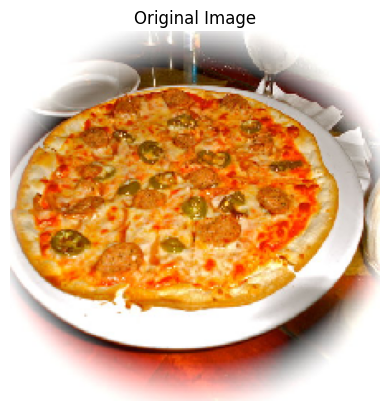

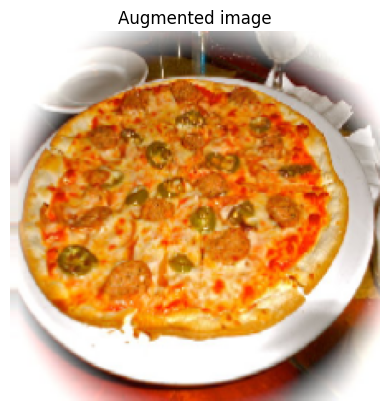

In [51]:

random_number = random.randint(0,32)
print(f'shwing image number: {random_number}')
plt.imshow(images[random_number])
plt.title('Original Image')
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False);

In [52]:
model_6 = Sequential()
model_6.add(Conv2D(10,3,activation = 'relu'))
model_6.add(MaxPool2D())
model_6.add(Conv2D(10,3,activation = 'relu'))
model_6.add(MaxPool2D())
model_6.add(Conv2D(10,3,activation = 'relu'))
model_6.add(MaxPool2D())
model_6.add(Flatten())
model_6.add(Dense(1,activation = 'sigmoid'))

model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

model_6.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
history_6 = model_6.fit(train_data_augmented,
                       epochs = 5,
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.4479 - loss: 0.8123 - val_accuracy: 0.5000 - val_loss: 0.6836
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.4261 - loss: 0.7134
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.5225 - loss: 0.6927 - val_accuracy: 0.5940 - val_loss: 0.6886
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.5582 - loss: 0.6948
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.4598 - loss: 0.6935 - val_accuracy: 0.5700 - val_loss: 0.6931


In [54]:
result_6 = model_6.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 378ms/step - accuracy: 0.6962 - loss: 0.6920


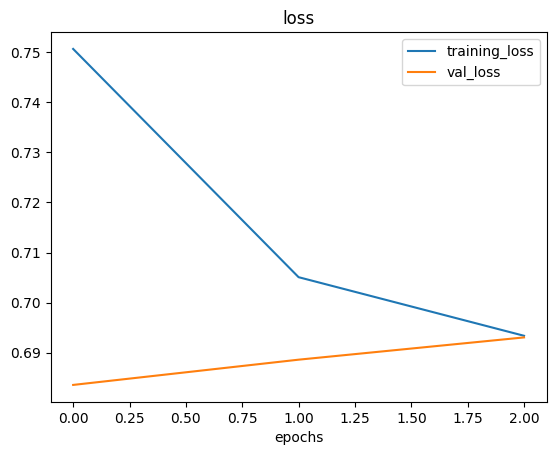

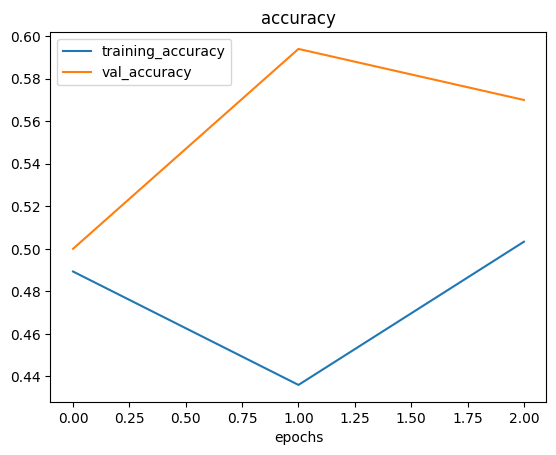

In [55]:
plot_loss_curves(history_6)


In [56]:
#shuffle the augmented data


train_data_augmented_shuffle =  train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [57]:
model_7 = Sequential()
model_7.add(Conv2D(10,3,activation = 'relu'))
model_7.add(MaxPool2D())
model_7.add(Conv2D(10,3,activation = 'relu'))
model_7.add(MaxPool2D())
model_7.add(Conv2D(10,3,activation = 'relu'))
model_7.add(MaxPool2D())
model_7.add(Flatten())
model_7.add(Dense(1,activation = 'sigmoid'))

model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

model_7.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [58]:
history_7 = model_7.fit(train_data_augmented_shuffle,
                       epochs = 5,
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.5831 - loss: 0.6654 - val_accuracy: 0.7580 - val_loss: 0.5084
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7165 - loss: 0.5395
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.7504 - loss: 0.5098 - val_accuracy: 0.8520 - val_loss: 0.3752
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.7978 - loss: 0.4564
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.7887 - loss: 0.4694 - val_accuracy: 0.8680 - val_loss: 0.3346


In [59]:
result_7 = model_7.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 326ms/step - accuracy: 0.8655 - loss: 0.3354


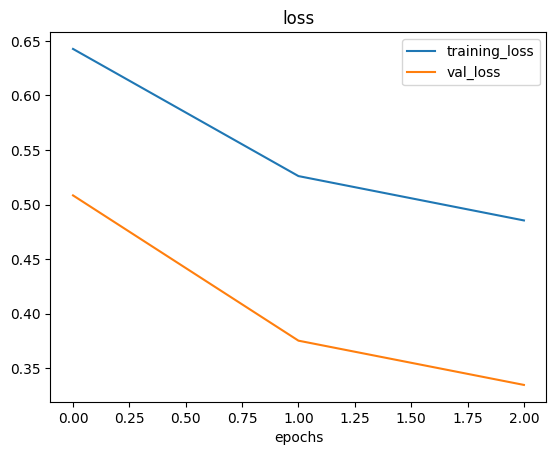

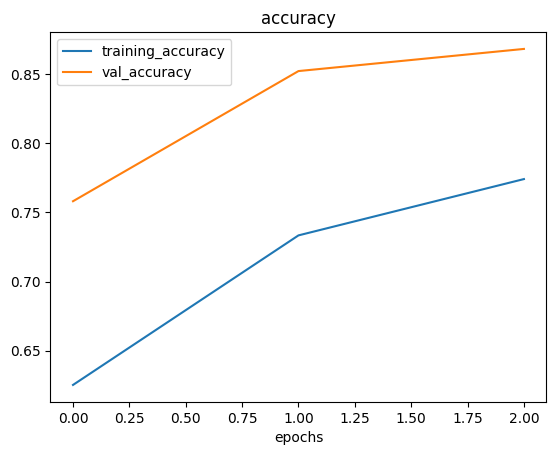

In [60]:
plot_loss_curves(history_7)

In [61]:
import pandas as pd

In [62]:
import pandas as pd


data = []
for i, result in enumerate([result_1, result_2, result_3, result_4, result_5, result_6, result_7]):

    data.append([f"Model {i+1}", result[0], result[1]])

result = pd.DataFrame(data=data, columns=["Model", "loss", "accuracy"])
result

,Model,loss,accuracy
0,Model 1,0.352234,0.848
1,Model 2,0.693151,0.500
2,Model 3,0.485526,0.782
3,Model 4,0.352234,0.848
4,Model 5,0.312162,0.876
5,Model 6,0.693060,0.570
6,Model 7,0.334621,0.868
